In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#### Numerical Integration

* Riemann sum: https://en.wikipedia.org/wiki/Riemann_sum
* Trapezoid rule: https://en.wikipedia.org/wiki/Trapezoidal_rule
* Simpson's rule: https://en.wikipedia.org/wiki/Simpson%27s_rule

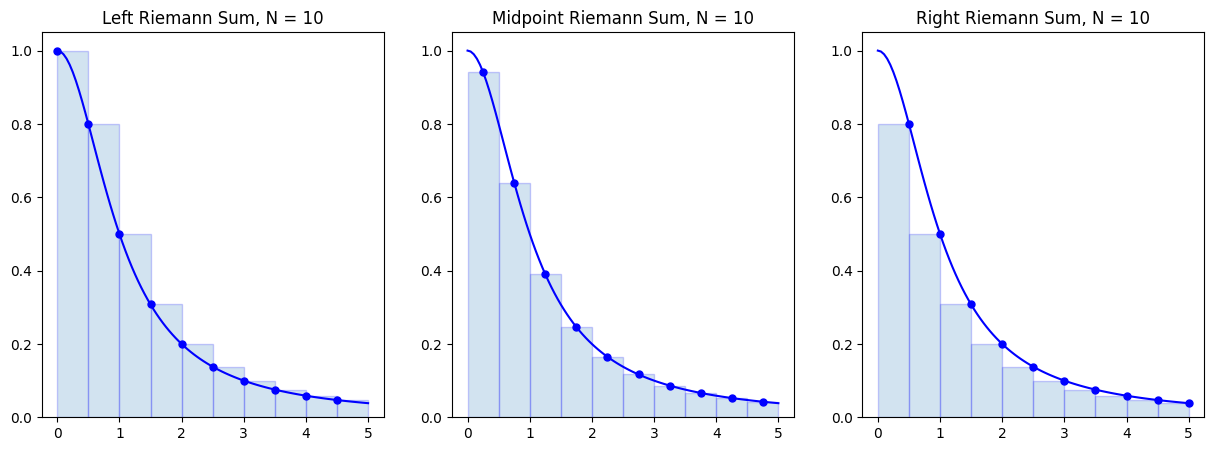

In [2]:
#reference:https://patrickwalls.github.io/mathematicalpython/integration/riemann-sums/

f = lambda x : 1/(1+x**2)
a = 0; b = 5; N = 10
n = 10 # Use n*N+1 points to plot the function smoothly

x = np.linspace(a,b,N+1)
y = f(x)

X = np.linspace(a,b,n*N+1)
Y = f(X)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(X,Y,'b')
x_left = x[:-1] # Left endpoints
y_left = y[:-1]
plt.plot(x_left,y_left,'b.',markersize=10)
plt.bar(x_left,y_left,width=(b-a)/N,alpha=0.2,align='edge',edgecolor='b')
plt.title('Left Riemann Sum, N = {}'.format(N))

plt.subplot(1,3,2)
plt.plot(X,Y,'b')
x_mid = (x[:-1] + x[1:])/2 # Midpoints
y_mid = f(x_mid)
plt.plot(x_mid,y_mid,'b.',markersize=10)
plt.bar(x_mid,y_mid,width=(b-a)/N,alpha=0.2,edgecolor='b')
plt.title('Midpoint Riemann Sum, N = {}'.format(N))

plt.subplot(1,3,3)
plt.plot(X,Y,'b')
x_right = x[1:] # Left endpoints
y_right = y[1:]
plt.plot(x_right,y_right,'b.',markersize=10)
plt.bar(x_right,y_right,width=-(b-a)/N,alpha=0.2,align='edge',edgecolor='b')
plt.title('Right Riemann Sum, N = {}'.format(N))

plt.show()

In [3]:
dx = (b-a)/N
x_left = np.linspace(a,b-dx,N)
x_midpoint = np.linspace(dx/2,b - dx/2,N)
x_right = np.linspace(dx,b,N)

print("Partition with",N,"subintervals.")
left_riemann_sum = np.sum(f(x_left) * dx)
print("Left Riemann Sum:",left_riemann_sum)

midpoint_riemann_sum = np.sum(f(x_midpoint) * dx)
print("Midpoint Riemann Sum:",midpoint_riemann_sum)

right_riemann_sum = np.sum(f(x_right) * dx)
print("Right Riemann Sum:",right_riemann_sum)

Partition with 10 subintervals.
Left Riemann Sum: 1.613488696614725
Midpoint Riemann Sum: 1.373543428316664
Right Riemann Sum: 1.1327194658454942


In [4]:
## Exact solution

I = np.arctan(5)
print(I)

1.373400766945016


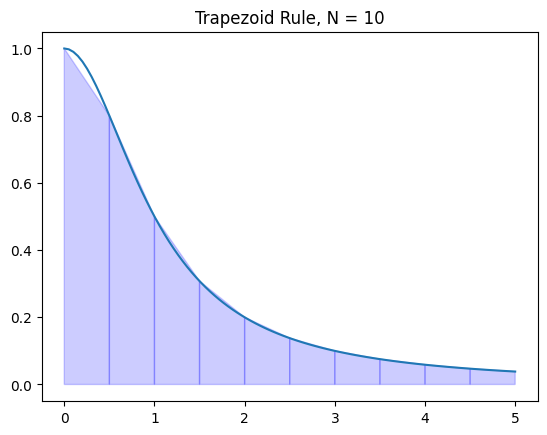

In [5]:
#Trapezoid rule

f = lambda x : 1/(1 + x**2)
a = 0; b = 5; N = 10

# x and y values for the trapezoid rule
x = np.linspace(a,b,N+1)
y = f(x)

# X and Y values for plotting y=f(x)
X = np.linspace(a,b,100)
Y = f(X)
plt.plot(X,Y)

for i in range(N):
    xs = [x[i],x[i],x[i+1],x[i+1]]
    ys = [0,f(x[i]),f(x[i+1]),0]
    plt.fill(xs,ys,'b',edgecolor='b',alpha=0.2)

plt.title('Trapezoid Rule, N = {}'.format(N))
plt.show()

In [6]:
def trapz(f,a,b,N=50):
    x = np.linspace(a,b,N+1) # N+1 points make N subintervals
    y = f(x)
    y_right = y[1:] # right endpoints
    y_left = y[:-1] # left endpoints
    dx = (b - a)/N
    T = (dx/2) * np.sum(y_right + y_left)
    return T

In [7]:
f = lambda x : 1/(1 + x**2)
a = 0; b = 5; N = 10

In [8]:
T = trapz(f,a,b,N)
print(T)

1.3731040812301096


### [Simpsons formula](https://en.wikipedia.org/wiki/Simpson%27s_rule)

[Animation](https://upload.wikimedia.org/wikipedia/commons/f/fc/Simpson%27s_One-Third_Rule.gif)

In [9]:
def simps(f,a,b,N=50):
    if N % 2 == 1:
        raise ValueError("N must be an even integer.")
    dx = (b-a)/N
    x = np.linspace(a,b,N+1)
    y = f(x)
    S = dx/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return S

In [10]:
f = lambda x : 1/(1 + x**2)
a = 0; b = 5; N = 10

In [11]:
S = simps(f,a,b,N)
print(S)

1.371454008759302


#### Approach 1

<div>
<img src="https://www.cut-the-knot.org/blue/AreaOfCircle1.jpg" width="400"/>
</div>


By counting: (points inside the circle) / (total points) ≈ (circle area) / (square area) 

*Convergence by increasing the density of grid points* 

#### Approach 2

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/2/20/MonteCarloIntegrationCircle.svg" width="250"/>
</div>

By counting: (points inside the circle) / (total points) ≈ (circle area) / (square area) 

*Convergence by increasing the number of points*

In [ ]:
# r = 1.0
# n = 0.

# grid = np.arange(-1,1.01,0.01)

# for x in grid:
#     for y in grid:
#         dist = np.sqrt(x**2 + y**2)
#         if dist <= r:
#             n = n+1

# area = (n/len(grid)**2)*((2*r)**2)
# print(area)

In [65]:
# n = 0.
# r = 1.0

# N = 10

# for i in range(N):
#     x = 2*np.random.random()-1.
#     y = 2*np.random.random()-1.
#     if np.sqrt(x**2 + y**2) <=r:
#         n = n+1.
        
# area = (n/float(N))*((2*r)**2)
# print(area)

3.6
